# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

##### 1. What does the data describe?

The dataset describes the SAT scores by subject for each state / territory in the United States.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The dataset looks complete to the extent that all states are included; however, there are some issues. Issues include:
- No sample size given
- Don't know if scores represent mean or median numbers
- Don't know when the observations were recorded or if from one sitting or averaged over multiple sittings of the exam

##### 3. Create a data dictionary for the dataset.

Data set contains four columns:
- State: abbreviation of state code
- Rate: participation rate of students taking the exam (assumed as not specified in data set)
- Verbal / Math columns: contain [mean] scores for that state among students who took the test

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [3]:
sat_csv = 'sat_scores.csv'

rows = []
with open(sat_csv, 'r') as f:
    reader = csv.reader(f)
    for line in reader:
        rows.append(line)

##### 5. Print the data

In [4]:
rows

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [5]:
labels = rows[0]
labels # list of labels

data = rows[1:]
data

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [6]:
state_names = [i[0] for i in data]
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS',
 'All']

##### 8. Print the types of each column

In [7]:
print[type(x) for x in data[0]]

[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
rate_list = [float(i[1]) for i in data]
rate_list
# print(rate_list)

verbal_list = [float(i[2]) for i in data]
verbal_list

math_list = [float(i[3]) for i in data]
math_list

data_correct = []
for item in data:
    new_list = [item[0]]
    new_list.append([int(i) for i in item[1:4]])
    data_correct.append(new_list)

print(data_correct)

[['CT', [82, 509, 510]], ['NJ', [81, 499, 513]], ['MA', [79, 511, 515]], ['NY', [77, 495, 505]], ['NH', [72, 520, 516]], ['RI', [71, 501, 499]], ['PA', [71, 500, 499]], ['VT', [69, 511, 506]], ['ME', [69, 506, 500]], ['VA', [68, 510, 501]], ['DE', [67, 501, 499]], ['MD', [65, 508, 510]], ['NC', [65, 493, 499]], ['GA', [63, 491, 489]], ['IN', [60, 499, 501]], ['SC', [57, 486, 488]], ['DC', [56, 482, 474]], ['OR', [55, 526, 526]], ['FL', [54, 498, 499]], ['WA', [53, 527, 527]], ['TX', [53, 493, 499]], ['HI', [52, 485, 515]], ['AK', [51, 514, 510]], ['CA', [51, 498, 517]], ['AZ', [34, 523, 525]], ['NV', [33, 509, 515]], ['CO', [31, 539, 542]], ['OH', [26, 534, 439]], ['MT', [23, 539, 539]], ['WV', [18, 527, 512]], ['ID', [17, 543, 542]], ['TN', [13, 562, 553]], ['NM', [13, 551, 542]], ['IL', [12, 576, 589]], ['KY', [12, 550, 550]], ['WY', [11, 547, 545]], ['MI', [11, 561, 572]], ['MN', [9, 580, 589]], ['KS', [9, 577, 580]], ['AL', [9, 559, 554]], ['NE', [8, 562, 568]], ['OK', [8, 567, 561

##### 10. Create a dictionary for each column mapping the State to its respective value for that column.

In [9]:
state_dict = dict(data_correct)
state_dict
#state_dict['AK'][0]

{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'All': [45, 506, 514],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],

In [10]:
# DON'T NEED ANYMORE
#state_dict = {}

#colValues = [[row[i] for row in data] for i in range(len(header))]
#colValues = [[row[i] for row in data_correct] for i in range(len(labels))]
#colValues

i = 0
for col in state_names:
    state_dict[col] = colValues[i]
    i += 1

state_dict

# See #4 in Independent Practice

# dict_rate = {row[0]: row[1] for row in data_clean}

NameError: name 'colValues' is not defined

##### 11. Create a dictionary with the values for each of the numeric columns

In [14]:
# Rate dictionary
rate_dict = {}
for state in state_dict:
    rate_dict[state] = state_dict[state][0]
print(rate_dict)

# Use iteritems?

# SAT Verbal Dictionary
verbal_dict = {}
for state in state_dict:
    verbal_dict[state] = state_dict[state][1]
print
print(verbal_dict)
print

# SAT Math Dictionary
math_dict = {}
for state in state_dict:
    math_dict[state] = state_dict[state][2]
print(math_dict)

{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'MA': 79, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'All': 45, 'OK': 8, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}

{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'MA': 511, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'All': 506, 'OK': 567, 'OH': 534, 'UT': 575, 'MO': 577, 'MN': 580, 'MI':

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [18]:
min_rate = min(rate_dict.values())
max_rate = max(rate_dict.values())
print(min_rate, max_rate)

min_verbal = min(verbal_dict.values())
max_verbal = max(verbal_dict.values())
print(min_verbal, max_verbal)

min_math = min(math_dict.values())
max_math = max(math_dict.values())
print(min_math, max_math)

(4, 82)
(482, 593)
(439, 603)


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [28]:
from math import sqrt

def standard_deviation(list):
    """Calculates the standard deviation for a list of numbers."""
    number_of_items = len(list)
    column_mean = sum(list) / number_of_items
    differences = [x - column_mean for x in list]
    squared_differences = [d ** 2 for d in differences]
    sum_of_squared_deviations = sum(squared_differences)
    variance = float(sum_of_squared_deviations) / number_of_items
    SD = sqrt(variance)
    print(SD)


# Test
x = (2, 4, 6)
standard_deviation(x)
np.std(x)

1.63299316186


1.6329931618554521

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

(array([ 16.,   6.,   2.,   3.,   0.,   1.,   9.,   4.,   7.,   4.]),
 array([  4. ,  11.8,  19.6,  27.4,  35.2,  43. ,  50.8,  58.6,  66.4,
         74.2,  82. ]),
 <a list of 10 Patch objects>)

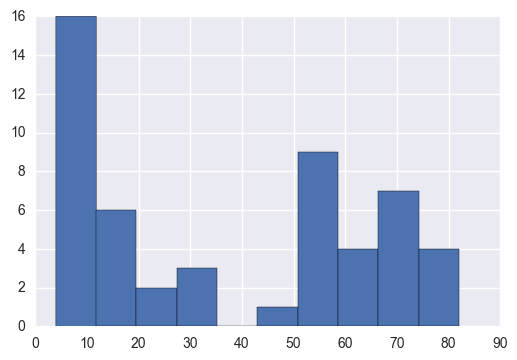

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure()
plt.hist(rate_dict.values())

# add title / column names, ...

##### 15. Plot the Math distribution

(array([  1.,   0.,   2.,  10.,  13.,   3.,   9.,   5.,   4.,   5.]),
 array([ 439. ,  455.4,  471.8,  488.2,  504.6,  521. ,  537.4,  553.8,
         570.2,  586.6,  603. ]),
 <a list of 10 Patch objects>)

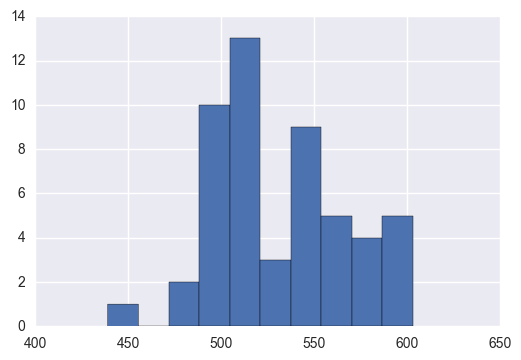

In [31]:
plt.figure()
plt.hist(math_dict.values())
# add title / column names, ...

##### 16. Plot the Verbal distribution

(array([ 6.,  8.,  9.,  3.,  3.,  4.,  3.,  7.,  6.,  3.]),
 array([ 482. ,  493.1,  504.2,  515.3,  526.4,  537.5,  548.6,  559.7,
         570.8,  581.9,  593. ]),
 <a list of 10 Patch objects>)

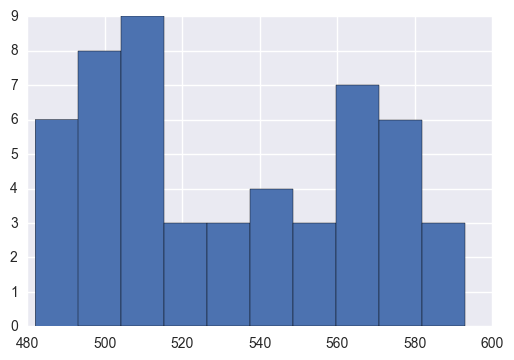

In [32]:
plt.figure()
plt.hist(verbal_dict.values())
# add title / column names, ...

##### 17. What is the typical assumption for data distribution?

Assume normality of the distribution

##### 18. Does that distribution hold true for our data?

None of the three distributions appear to be normally distributed

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

In [55]:
rate = [thing[1][0] for thing in data_correct]
math = [thing[1][1] for thing in data_correct]
verbal = [thing[1][2] for thing in data_correct]
total_score = [math[i] + verbal[i] for i in range(50)]
total_score

[1019,
 1012,
 1026,
 1000,
 1036,
 1000,
 999,
 1017,
 1006,
 1011,
 1000,
 1018,
 992,
 980,
 1000,
 974,
 956,
 1052,
 997,
 1054,
 992,
 1000,
 1024,
 1015,
 1048,
 1024,
 1081,
 973,
 1078,
 1039,
 1085,
 1115,
 1093,
 1165,
 1100,
 1092,
 1133,
 1169,
 1157,
 1113,
 1130,
 1128,
 1154,
 1126,
 1180,
 1112,
 1145,
 1196,
 1159,
 1191]

(200, 800)

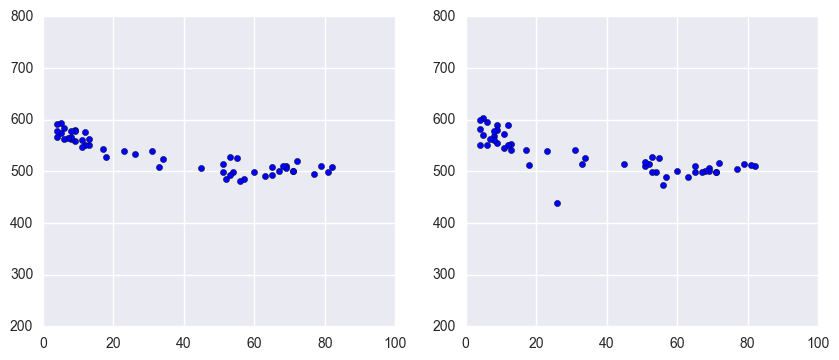

In [57]:
plt.figure(figsize=(10,4))

# Math
plt.subplot(1,2,1)
plt.scatter(rate, math)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 100)
plt.ylim(200,800)

# Verbal
plt.subplot(1,2,2)
plt.scatter(rate, verbal)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 100)
plt.ylim(200,800)


# TO DO: by region

##### 20. Are there any interesting relationships to note?

##### 21. Create box plots for each variable. 

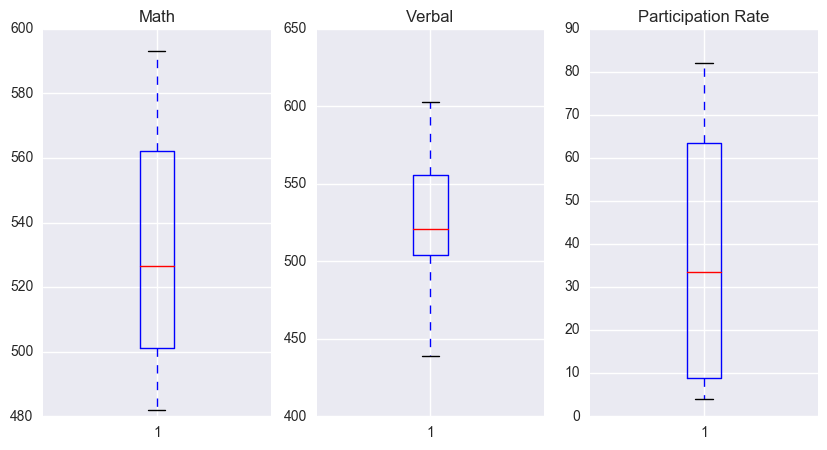

In [66]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].boxplot(math)
ax[0].set_title("Math")

ax[1].boxplot(verbal)
ax[1].set_title("Verbal")

ax[2].boxplot(rate)
ax[2].set_title("Participation Rate")

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 